In [32]:
import numpy as np
import pandas as pd

Import hourly counts data, + plus weather data, and merge:

In [39]:
df = pd.read_csv('../data/hourlycounts_through2019.csv')
weather = pd.read_csv('./data/cntrlprk_weather.csv')
new_df = pd.merge(df, weather,  how='left', left_on=['year', 'month', 'day'], right_on = ['YEAR', 'MONTH', 'DAY'])
new_df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'],inplace=True)
new_df.drop(columns=['YEAR', 'MONTH', 'DAY'], inplace=True)

In [40]:
df['hour'].min(), df['hour'].max()

(0, 23)

In [41]:
new_df.head()

,Unnamed: 0.1,year,month,day,hour,num_calls,BRONX,BROOKLYN,MANHATTAN,QUEENS,...,STATION,NAME,DATE,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,TAVG_CALC
0,0,2010,1,1,1,347,60,80,153,45,...,USW00094728,"NY CITY CENTRAL PARK, NY US",2010-01-01,3.36,0.03,0.0,0.0,40.0,33.0,36.5
1,1,2010,1,1,2,318,75,83,93,58,...,USW00094728,"NY CITY CENTRAL PARK, NY US",2010-01-01,3.36,0.03,0.0,0.0,40.0,33.0,36.5
2,2,2010,1,1,3,262,63,62,85,45,...,USW00094728,"NY CITY CENTRAL PARK, NY US",2010-01-01,3.36,0.03,0.0,0.0,40.0,33.0,36.5
3,3,2010,1,1,4,281,63,69,90,52,...,USW00094728,"NY CITY CENTRAL PARK, NY US",2010-01-01,3.36,0.03,0.0,0.0,40.0,33.0,36.5
4,4,2010,1,1,5,201,55,55,48,39,...,USW00094728,"NY CITY CENTRAL PARK, NY US",2010-01-01,3.36,0.03,0.0,0.0,40.0,33.0,36.5


SAVE NEW MERGED DATA:

In [42]:
new_df.to_csv('./data/hourlycounts_weather.csv')

EDA:

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns


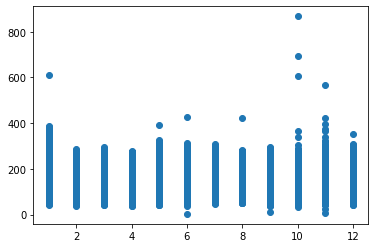

In [44]:
plt.scatter(new_df['month'],new_df['num_calls']);

The relationship between month and call volume is messy. Let's clean it up a bit:

In [45]:
chk = new_df.groupby('month')['num_calls'].sum()
chk.shape

(12,)

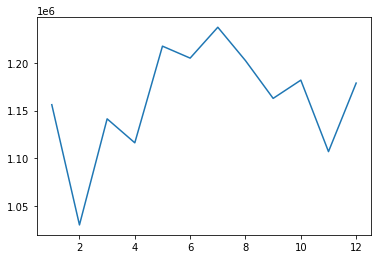

In [46]:
plt.plot(chk);

Which features are most important?

In [47]:
new_df.corr()['num_calls']

Unnamed: 0.1                0.213306
year                        0.211975
month                       0.024806
day                        -0.025615
hour                        0.588059
num_calls                   1.000000
BRONX                       0.896584
BROOKLYN                    0.918724
MANHATTAN                   0.907948
QUEENS                      0.879657
RICHMOND / STATEN ISLAND    0.624136
UNKNOWN                     0.001204
AWND                       -0.094331
PRCP                       -0.014071
SNOW                       -0.016506
SNWD                       -0.028409
TMAX                        0.103907
TMIN                        0.099909
TAVG_CALC                   0.103021
Name: num_calls, dtype: float64

Correlations are not high, but that doesn't mean there's no relationship -- probably they are not linear.

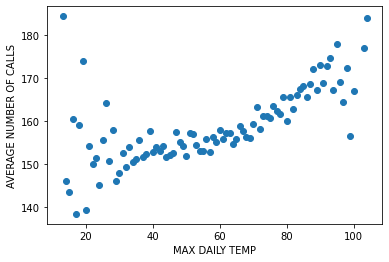

In [48]:
chk0 = new_df['TMAX'].unique()
chk0.sort()
chk1 = new_df.groupby('TMAX')['num_calls'].mean()
plt.scatter(chk0,chk1);
plt.xlabel('MAX DAILY TEMP');
plt.ylabel('AVERAGE NUMBER OF CALLS');

# Call volume vs. Max temperature is definitely non-linear

# (calls can spike on either extreme)

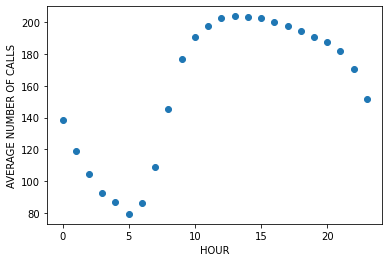

In [49]:
chk0 = new_df['hour'].unique()
chk0.sort()
chk1 = new_df.groupby('hour')['num_calls'].mean()
plt.scatter(chk0,chk1);
plt.xlabel('HOUR');
plt.ylabel('AVERAGE NUMBER OF CALLS');

# So is Call volume vs. Hour (more calls in daytime, fewer at night)

Linear modeling will likely require polynomial features.

In [50]:
# Check for NULLS:

new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87631 entries, 0 to 87630
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0.1              87631 non-null  int64  
 1   year                      87631 non-null  int64  
 2   month                     87631 non-null  int64  
 3   day                       87631 non-null  int64  
 4   hour                      87631 non-null  int64  
 5   num_calls                 87631 non-null  int64  
 6   BRONX                     87631 non-null  int64  
 7   BROOKLYN                  87631 non-null  int64  
 8   MANHATTAN                 87631 non-null  int64  
 9   QUEENS                    87631 non-null  int64  
 10  RICHMOND / STATEN ISLAND  87631 non-null  int64  
 11  UNKNOWN                   87631 non-null  int64  
 12  STATION                   87631 non-null  object 
 13  NAME                      87631 non-null  object 
 14  DATE  

Once again wind has a lot of nulls -- as a first pass we will probably drop this column.